In [1]:
import os, zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
zip_path = r"C:\Users\Keert\OneDrive\Desktop\archive.zip"
extract_path = "/Downloads/archive"

In [3]:
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("Dataset extracted!")

# Paths for train/test (fixed)
train_path = os.path.join(extract_path, "train")
val_path   = os.path.join(extract_path, "test")

Dataset extracted!


In [4]:
img_size = 120
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    r"Downloads/archive/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    r"Downloads/archive/test",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


✅ Classes: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


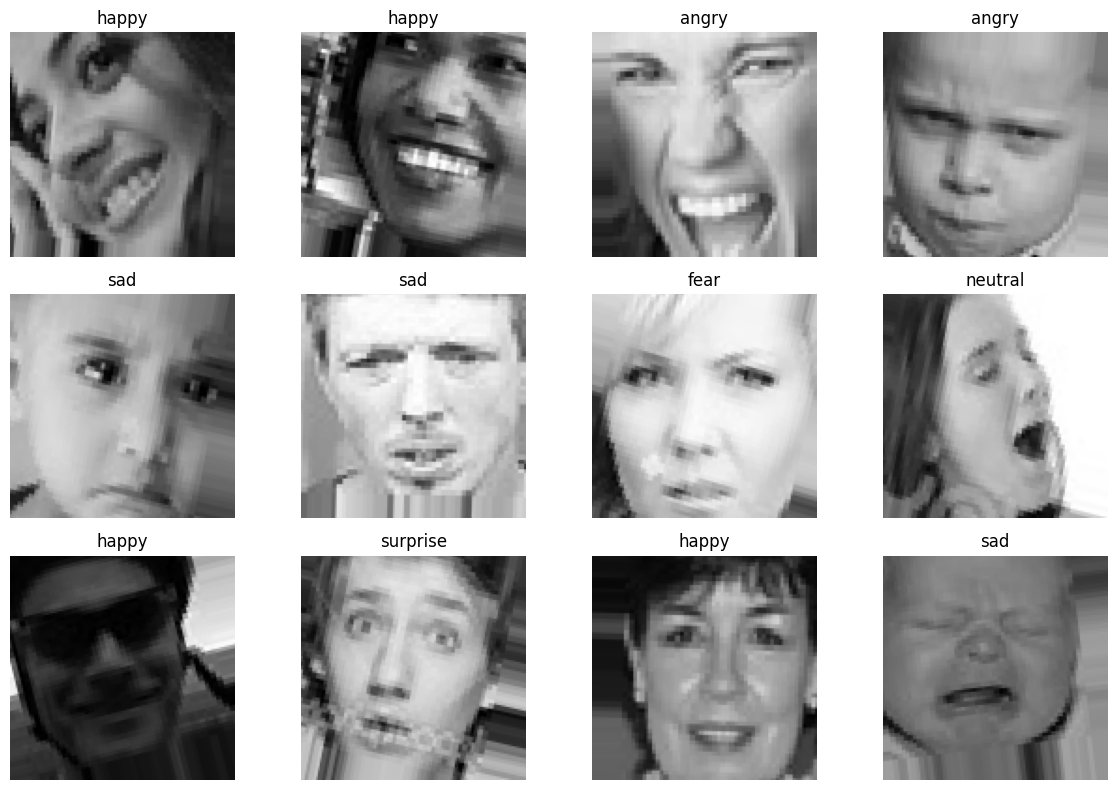

Image shape: (120, 120, 3)
Image max: 0.654902 min: 0.011764707


In [6]:
import matplotlib.pyplot as plt
import numpy as np

print(f"✅ Classes: {train_data.class_indices}")

images, labels = next(train_data)

plt.figure(figsize=(12, 8))
for i in range(min(12, len(images))):
    plt.subplot(3, 4, i + 1)

    img = images[i]

    if img.shape[-1] == 1:  # Grayscale
        img = img.squeeze()
        plt.imshow((img * 255).astype("uint8"), cmap='gray')
    else:  # RGB
        plt.imshow((img * 255).astype("uint8"))

    class_name = list(train_data.class_indices.keys())[np.argmax(labels[i])]
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()
print("Image shape:", img.shape)
print("Image max:", img.max(), "min:", img.min())

In [7]:
num_classes = len(train_data.class_indices)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15
)

C:\Users\Keert\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 118, 118, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 57, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,863,175 (10.92 MB)

 Trainable params: 2,863,175 (10.92 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\Keert\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 941s 1s/step - accuracy: 0.2664 - loss: 1.7785 - val_accuracy: 0.3324 - val_loss: 1.6797
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 433s 482ms/step - accuracy: 0.3257 - loss: 1.6833 - val_accuracy: 0.4178 - val_loss: 1.5211
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 405s 451ms/step - accuracy: 0.3811 - loss: 1.5901 - val_accuracy: 0.4635 - val_loss: 1.3989
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 401s 447ms/step - accuracy: 0.4127 - loss: 1.5163 - val_accuracy: 0.4797 - val_loss: 1.3428
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 405s 451ms/step - accuracy: 0.4294 - loss: 1.4755 - val_accuracy: 0.4781 - val_loss: 1.3451
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 405s 451ms/step - accuracy: 0.4488 - loss: 1.4373 - val_accuracy: 0.5084 - val_loss: 1.2896
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 393s 437ms/step - accuracy: 0.4609 - loss: 1.4013 - val_accuracy: 0.5245 - val_loss: 1.2607
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 395s 440ms/step - accuracy: 0.4718 - lo

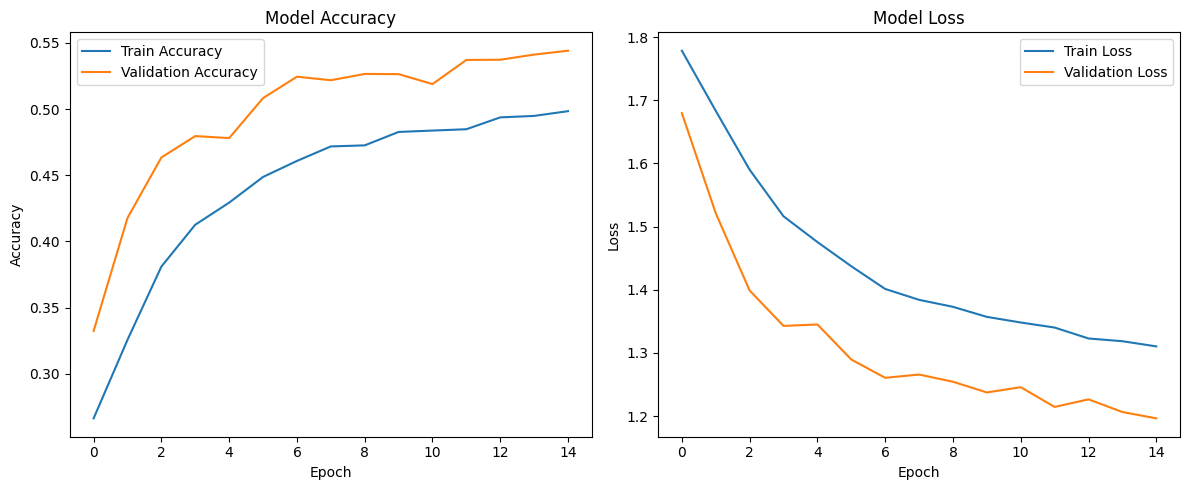

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()